In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\anass\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset_tomato/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Users\\anass\\Plant_Diseases_Detection\\Training\\AugmentedImagesTomato"
)

Found 2479 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Tomato_Early_blight': 0, 'Tomato_Leaf_Mold': 1, 'Tomato_healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Early_blight', 'Tomato_Leaf_Mold', 'Tomato_healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break


[[[0.57115644 0.5515486  0.5672349 ]
  [0.57357097 0.5539631  0.5696494 ]
  [0.57598555 0.5563777  0.572064  ]
  ...
  [0.49951687 0.47990903 0.4955953 ]
  [0.508484   0.48887616 0.50456244]
  [0.500722   0.48111415 0.49680042]]

 [[0.5152752  0.49566734 0.5113536 ]
  [0.5244505  0.50484264 0.5205289 ]
  [0.5336258  0.51401794 0.5297042 ]
  ...
  [0.5014485  0.48184067 0.49752694]
  [0.5080011  0.48839325 0.5040795 ]
  [0.49879032 0.47918248 0.49486876]]

 [[0.5262009  0.50659305 0.5222793 ]
  [0.5194402  0.4998323  0.5155186 ]
  [0.5126794  0.49307156 0.5087578 ]
  ...
  [0.5033802  0.4837723  0.49945858]
  [0.5075182  0.48791033 0.5035966 ]
  [0.4968587  0.47725084 0.49293712]]

 ...

 [[0.38479882 0.3769557  0.3887204 ]
  [0.35681933 0.3489762  0.3607409 ]
  [0.30356675 0.29572362 0.30748832]
  ...
  [0.5027468  0.49490362 0.5066684 ]
  [0.47232342 0.46448028 0.476245  ]
  [0.44190007 0.43405694 0.44582164]]

 [[0.38721338 0.37937024 0.39113495]
  [0.3452295  0.33738637 0.34915107]


In [9]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset_tomato/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 354 images belonging to 3 classes.


In [10]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset_tomato/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 710 images belonging to 3 classes.


In [11]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.527994   0.48545    0.61463046]
  [0.5093008  0.46889973 0.5706331 ]
  [0.5535997  0.5065409  0.5790506 ]
  ...
  [0.31695968 0.27382243 0.43852833]
  [0.31741902 0.27428177 0.43898767]
  [0.31787837 0.27474108 0.439447  ]]

 [[0.52858454 0.48597497 0.6156148 ]
  [0.5080541  0.46778417 0.5699769 ]
  [0.5556995  0.5086407  0.58180666]
  ...
  [0.34579125 0.302654   0.4673599 ]
  [0.34644744 0.3033102  0.4680161 ]
  [0.34710363 0.30396637 0.46867228]]

 [[0.52917516 0.48649988 0.616599  ]
  [0.5068073  0.46666867 0.56932074]
  [0.55779934 0.5107405  0.5845626 ]
  ...
  [0.3790094  0.33587214 0.50057805]
  [0.37881252 0.33567527 0.5003812 ]
  [0.37861568 0.3354784  0.5001843 ]]

 ...

 [[0.53999215 0.58705103 0.7752863 ]
  [0.5401234  0.5871822  0.77541757]
  [0.54025465 0.5873135  0.77554876]
  ...
  [0.41914693 0.48189205 0.68189204]
  [0.42306796 0.48581305 0.68581307]
  [0.42352945 0.48627454 0.6862745 ]]

 [[0.54450536 0.5915642  0.7797995 ]
  [0.544571   0.5916298  0.7798651 ]


In [12]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [13]:
##Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 108s 2s/step - loss: 1.0411 - accuracy: 0.4385 - val_loss: 1.0093 - val_accuracy: 0.5104
Epoch 2/20
47/47 [==============================] - 174s 4s/step - loss: 0.8628 - accuracy: 0.5696 - val_loss: 0.5894 - val_accuracy: 0.7500
Epoch 3/20
47/47 [==============================] - 83s 2s/step - loss: 0.6092 - accuracy: 0.7586 - val_loss: 0.4665 - val_accuracy: 0.8073
Epoch 4/20
47/47 [==============================] - 140s 3s/step - loss: 0.4419 - accuracy: 0.8258 - val_loss: 0.6689 - val_accuracy: 0.7188
Epoch 5/20
47/47 [==============================] - 78s 2s/step - loss: 0.4352 - accuracy: 0.8406 - val_loss: 1.0201 - val_accuracy: 0.6823
Epoch 6/20
47/47 [==============================] - 76s 2s/step - loss: 0.4573 - accuracy: 0.8245 - val_loss: 0.5023 - val_accuracy: 0.8073
Epoch 7/20
47/47 [==============================] - 140s 3s/step - loss: 0.3428 - accuracy: 0.8890 - val_loss: 0.2250 - val_accuracy: 0.9062
Epoch 8/20
47/47

first image to predict
actual label: Tomato_healthy
1/1 [==============================] - 0s 379ms/step
predicted label: Tomato_healthy


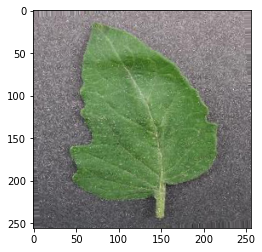

In [15]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [16]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 32ms/step


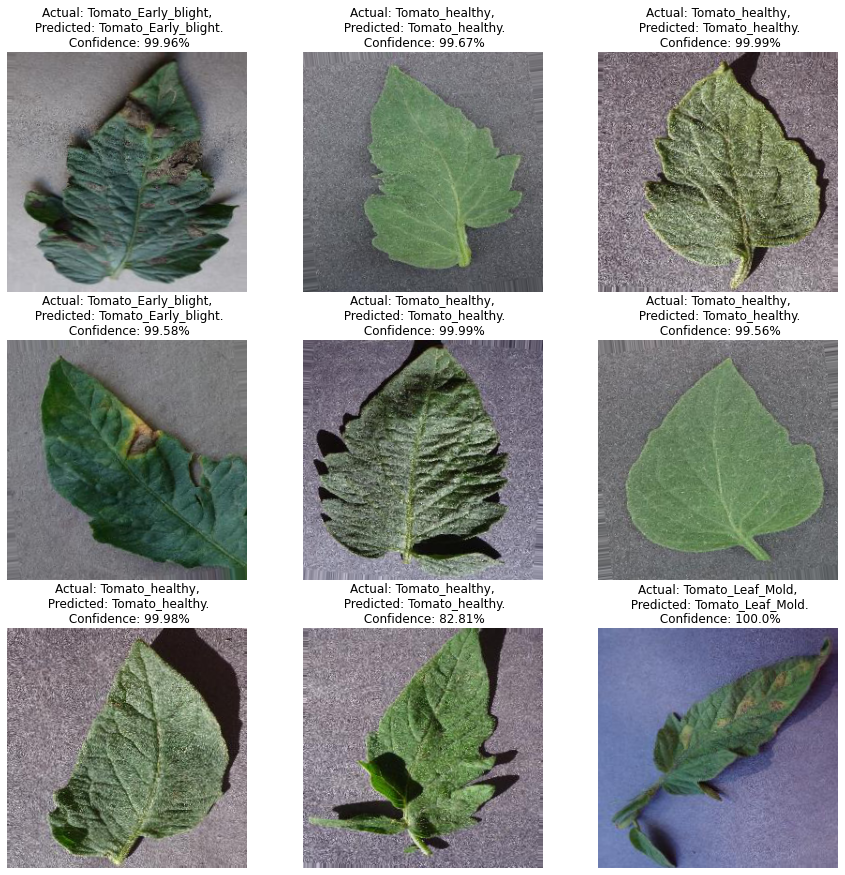

In [17]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [18]:
model.save("../TomatoModel.h5")